# All Togehter using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [7]:
_df = pd.read_csv("final_datasets/botnet_binary.csv")
_df.LABEL.mask(_df.LABEL == True, "Botnet", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = _df
_df = pd.read_csv("final_datasets/decrypto_dataset_design.csv")
_df.LABEL.mask(_df.LABEL == True, "Cryptomining", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/decrypto_dataset_evaluation.csv")
_df.LABEL.mask(_df.LABEL == True, "Cryptomining", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/dns_malware.csv")
_df.LABEL.mask(_df.LABEL == True, "DNS malware", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])

_df = pd.read_csv("final_datasets/doh_cic.csv")
_df.LABEL.mask(_df.LABEL == True, "DoH", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/doh_real_world.csv")
_df.LABEL.mask(_df.LABEL == True, "DoH", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/dos.csv")
_df.LABEL.mask(_df.LABEL == True, "DoS", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/edge_iiot_binary.csv")
_df.LABEL.mask(_df.LABEL == True, "IoT malware", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/http_bruteforce.csv")
_df.LABEL.mask(_df.LABEL == True, "HTTPS Brute Force", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/ids_cic_binary.csv")
_df.LABEL.mask(_df.LABEL == True, "Intrusion", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/iot_23.csv")
_df.LABEL.mask(_df.LABEL == True, "IoT malware", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/ton_iot_binary.csv")
_df.LABEL.mask(_df.LABEL == True, "IoT malware", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/tor_binary.csv")
_df.LABEL.mask(_df.LABEL == True, "TOR", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/unsw_binary.csv")
_df.LABEL.mask(_df.LABEL == True, "Intrusion", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/vpn_iscx_binary.csv")
_df.LABEL.mask(_df.LABEL == True, "VPN", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
_df = pd.read_csv("final_datasets/vpn_vnat_binary.csv")
_df.LABEL.mask(_df.LABEL == True, "VPN", inplace=True)
_df.LABEL.mask(_df.LABEL == False, "Clear", inplace=True)
df = pd.concat([df, _df])
df.reset_index(inplace=True)
display(df)

,index,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,0,147.32.84.165,147.32.80.9,1025,53,1.312967e+09,1.312967e+09,Botnet,4,...,235.084382,2.796482,0.497004,1.131372,2.276383,0.455277,0.000006,2.254977,1.200000,0.666667
1,1,1,147.32.84.165,147.32.84.255,137,137,1.312967e+09,1.312967e+09,Clear,38,...,125.329881,4.164066,0.428112,5.330970,12.452268,0.336548,0.000000,1.763265,0.324324,1.000000
2,2,2,147.32.84.165,147.32.84.255,138,138,1.312967e+09,1.312967e+09,Clear,6,...,253.565245,0.986151,0.666641,2.675396,4.013247,0.802649,0.000011,4.012922,0.800000,1.000000
3,3,3,60.190.222.139,147.32.84.165.,65520,1039,1.312967e+09,1.312967e+09,Clear,4,...,163.003834,1.318585,0.339969,0.866065,2.547480,0.849160,0.305220,1.936479,0.666667,1.000000
4,4,4,147.32.84.165,60.190.222.139.,1039,65520,1.312967e+09,1.312967e+09,Clear,10,...,76.264015,2.103153,0.283852,0.843926,2.973125,0.330347,0.000007,2.353862,0.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29489211,43395,43395,10.122.1.2,10.124.1.2,43629,53,1.563289e+09,1.563289e+09,Clear,1,...,119.000000,0.000000,0.500000,0.000107,0.000214,0.000214,0.000214,0.000214,0.000000,0.500000
29489212,43396,43396,10.122.1.2,10.124.1.2,18920,53,1.563289e+09,1.563289e+09,Clear,1,...,127.251719,0.250000,0.500000,0.000390,0.000780,0.000780,0.000780,0.000780,2.000000,0.500000
29489213,43397,43397,10.122.1.2,10.124.1.2,20509,53,1.563289e+09,1.563289e+09,Clear,1,...,127.251719,0.250000,0.500000,0.000211,0.000421,0.000421,0.000421,0.000421,2.000000,0.500000
29489214,43398,43398,10.122.1.2,10.124.1.2,5279,53,1.563289e+09,1.563289e+09,Clear,1,...,127.251719,0.250000,0.500000,0.000192,0.000384,0.000384,0.000384,0.000384,2.000000,0.500000


In [2]:
# df = pd.read_csv("final_datasets/all_multiclass.csv")

In [3]:
# df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,147.32.80.9,147.32.84.165,4,2,134,558,1.312967e+09,1.312967e+09,53,...,207900.070205,0.885171,0.205123,0.417904,NaN,4248.583372,4544.559854,0.564213,0.003325,botnet
1,1,147.32.84.255,147.32.84.165,38,0,2476,0,1.312967e+09,1.312967e+09,137,...,5314.872532,0.038851,0.241710,0.223803,-1.333903,3.640725,0.786195,-0.830029,0.046606,clear
2,2,147.32.84.255,147.32.84.165,6,0,1160,0,1.312967e+09,1.312967e+09,138,...,-271216.457937,0.010243,0.393857,0.271931,NaN,214.629001,1171.605316,-0.489713,0.011965,clear
3,3,147.32.84.165.,60.190.222.139,4,0,249,0,1.312967e+09,1.312967e+09,1039,...,-1060.499747,0.006667,0.407122,0.273574,-0.362061,1.505125,2.539462,-0.400313,0.010620,clear
4,4,60.190.222.139.,147.32.84.165,10,0,138,0,1.312967e+09,1.312967e+09,65520,...,-4837.676869,0.187056,0.482592,0.285750,-0.098411,1.314013,2.857491,0.565604,0.021624,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19621025,19621025,52.50.215.119.,192.168.20.191,12,0,1168,0,1.578933e+09,1.578933e+09,443,...,2686.423343,0.357115,0.549690,0.279789,0.176361,1.515317,0.732219,0.840360,0.168880,clear
19621026,19621026,192.168.20.191.,193.200.65.5,9,0,5915,0,1.578933e+09,1.578933e+09,53993,...,-337596.929634,0.802327,0.217884,NaN,NaN,-841.447379,22842.921830,0.403095,0.000602,clear
19621027,19621027,192.168.20.191.,52.50.215.119,11,0,4608,0,1.578933e+09,1.578933e+09,53994,...,2992.511286,0.360095,0.536066,0.283979,0.116189,1.402746,0.815883,0.462496,0.198089,clear
19621028,19621028,85.194.242.103.,192.168.20.191,9,0,1073,0,1.578933e+09,1.578933e+09,443,...,2156.966910,0.402808,0.541766,0.270578,0.158447,1.553336,0.760355,-0.415611,0.138390,clear


In [12]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [13]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [14]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().iterrows():
    classifications_array.append(row[0])
classifications_array

['Botnet',
 'Clear',
 'Cryptomining',
 'DNS malware',
 'DoH',
 'DoS',
 'IoT malware',
 'HTTPS Brute Force',
 'Intrusion',
 'TOR',
 'VPN']

In [15]:
df = df[features + ["LABEL_code"]]

In [16]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    try:
        indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
        return df[indices_to_keep].astype(np.float64)
    except: 
        return df

df = clean_dataset(df)

In [17]:
df.shape

(29489216, 25)

In [18]:
df.LABEL_code.value_counts()

1.0     15584273
8.0      6621314
4.0      5442232
2.0      1088073
7.0       589217
5.0        60963
6.0        39530
0.0        37546
10.0       24551
9.0         1260
3.0          257
Name: LABEL_code, dtype: int64

In [19]:
df_validation = df.sample(n = 10000000)
df_features =  df[~df.isin(df_validation)].dropna()

In [20]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [21]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='weighted')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [22]:
best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(n = 500000), features, verbose=False)

100%|██████████| 100/100 [2:48:49<00:00, 101.29s/trial, best loss: -0.9655638673773802] 
The best hyperparameters are :  

{'colsample_bytree': 0.058444263782066797, 'gamma': 3.408204388199506, 'max_depth': 30.0, 'min_child_weight': 8.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 0.266728028338203}


In [23]:
X=df_features[features]  # Features
y=df_features['LABEL_code']  # Labels
model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=3.408204388199506,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=8,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

                   precision    recall  f1-score   support

           Botnet     0.9936    0.9666    0.9799     12751
            Clear     0.9755    0.9682    0.9718   5283309
     Cryptomining     0.9973    0.9952    0.9962    368528
      DNS malware     0.9079    0.7667    0.8313        90
              DoH     0.9239    0.9498    0.9367   1844524
              DoS     0.9870    0.9133    0.9487     20711
      IoT malware     0.9980    0.9923    0.9951     13287
HTTPS Brute Force     0.9360    0.8989    0.9170    200484
        Intrusion     0.9803    0.9806    0.9805   2247509
              TOR     0.8580    0.6507    0.7401       418
              VPN     0.9371    0.7125    0.8095      8389

         accuracy                         0.9669  10000000
        macro avg     0.9541    0.8904    0.9188  10000000
     weighted avg     0.9671    0.9669    0.9669  10000000



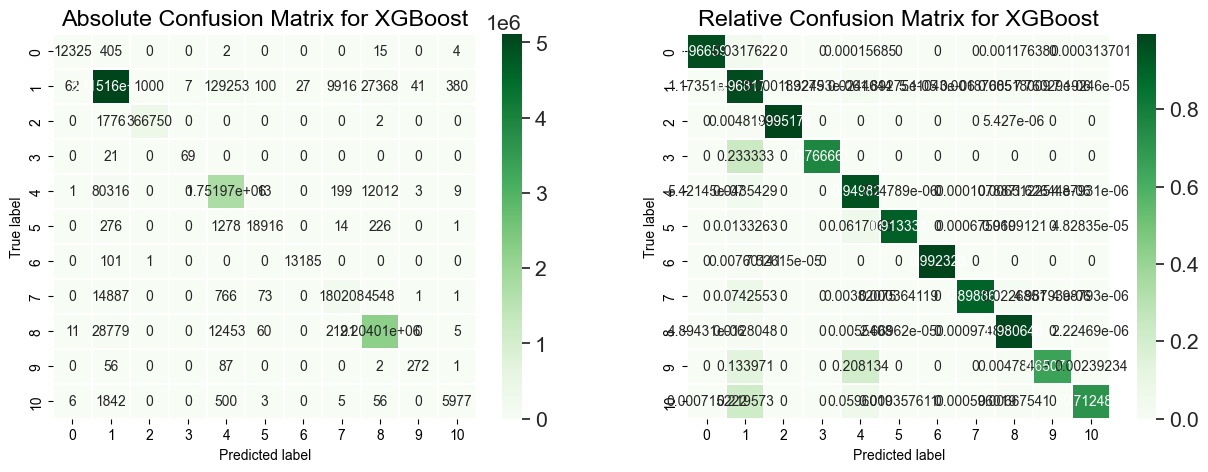

In [24]:
X_validation = df_validation[features]  # Features
y_validation = df_validation['LABEL_code']  # Labels
y_pred = model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array,digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

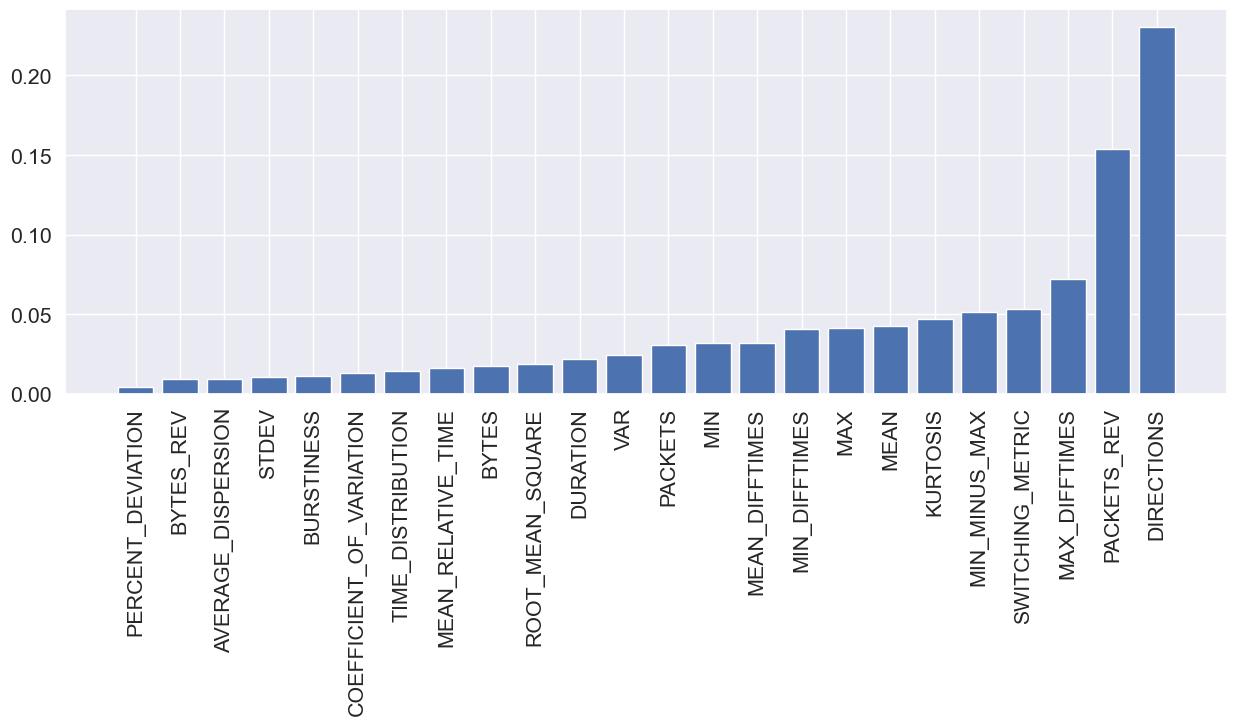

In [25]:
feat_importances = pd.Series(model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [26]:
feat_importances.to_dict()

{'PERCENT_DEVIATION': 0.004720950033515692,
 'BYTES_REV': 0.009142427705228329,
 'AVERAGE_DISPERSION': 0.009177709929645061,
 'STDEV': 0.010452664457261562,
 'BURSTINESS': 0.011614540591835976,
 'COEFFICIENT_OF_VARIATION': 0.013430997729301453,
 'TIME_DISTRIBUTION': 0.014585552737116814,
 'MEAN_RELATIVE_TIME': 0.016122568398714066,
 'BYTES': 0.017330406233668327,
 'ROOT_MEAN_SQUARE': 0.018818607553839684,
 'DURATION': 0.022190095856785774,
 'VAR': 0.024512244388461113,
 'PACKETS': 0.031073277816176414,
 'MIN': 0.032076939940452576,
 'MEAN_DIFFTIMES': 0.03222358971834183,
 'MIN_DIFFTIMES': 0.040933720767498016,
 'MAX': 0.04137599840760231,
 'MEAN': 0.042514361441135406,
 'KURTOSIS': 0.04698886722326279,
 'MIN_MINUS_MAX': 0.051706183701753616,
 'SWITCHING_METRIC': 0.05330212786793709,
 'MAX_DIFFTIMES': 0.07191642373800278,
 'PACKETS_REV': 0.15364877879619598,
 'DIRECTIONS': 0.2301410436630249}